# Proyek UTS PMDPM

<b>Harap jangan menghapus cell dan komentar yang diberikan!</b>

- Setiap cell markdown dan code akan berisi instruksi pengerjaan Proyek UTS PMDPM

- Dalam notebook ini Anda akan diminta untuk membuat sebuah proyek Pembelajaran Mesin menggunakan dataset yang sudah disediakan.
- Proyek akan terdiri dari proses inisialisasi, data loading, data cleansing dan encoding, modelling, dan evaluasi model.

- Pada bagian akhir silahkan berikan laporan singkat berupa jawaban pertanyaan dari proyek yang sudah dikerjakan.

### Inisialisasi

- Bagian berikut berisi import library yang dibutuhkan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectPercentile, RFE, SelectKBest, SelectFromModel
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error

### Data Loading

- Bagian berikut berisi proses data loading (boleh dengan file upload atau dengan mount drive jika menggunakan Google Colab)

In [3]:
df_heart = pd.read_csv('heart.csv')
df_heart.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


### Data Cleansing & Encoding

- Bagian berikut berisi proses pembersihan data.
- Periksa apakah terdapat missing value dan data duplikat,
- Ubah data kategorik string menjadi numerik.

- Cek missing value

In [4]:
print("Data null \n", df_heart.isnull().sum())
print("Data kosong \n", df_heart.empty)
print("Data NaN \n", df_heart.isna().sum())

Data null 
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64
Data kosong 
 False
Data NaN 
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [5]:
print("sebelum drop missing value", df_heart.shape)
df_heart2 = df_heart.dropna(how = "any", inplace = False)
print("Sesudah drop missing value", df_heart2.shape)
df_heart2.head(10)

sebelum drop missing value (918, 12)
Sesudah drop missing value (918, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


- Cek data duplikat

In [6]:
print("Sebelum pengecekan data duplikat", df_heart2.shape)
cols_to_check = ["Age","Sex","ChestPainType","RestingBP",
                 "Cholesterol","FastingBS","RestingECG",
                 "MaxHR","ExerciseAngina","Oldpeak","ST_Slope","HeartDisease"]
df_heart3 = df_heart2[~df_heart2[cols_to_check].duplicated(keep='last')]
print("Sesudah pengecekan data duplikat", df_heart3.shape)

Sebelum pengecekan data duplikat (918, 12)
Sesudah pengecekan data duplikat (918, 12)


### Train-test split

- Untuk nilai parameter random_state, sesuaikan dengan dua digit terakhir nomor pegawai terbesar (red: dua digit terakhir NPM terbesar).
- Silahkan memodifikasi persentase train-test split terbaik antara 80:20, 75:25, atau 70:30. 

In [7]:
X = df_heart3.drop(columns=['HeartDisease'],axis=1)
y = df_heart3.HeartDisease

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=96)
print(X_train.shape)
print(X_test.shape)

(688, 11)
(230, 11)


### Data enkoder

In [8]:
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()
print("Kolom kategorik:",cat_cols)

transformer = make_column_transformer(
    (OneHotEncoder(), cat_cols),
    remainder = 'passthrough'
)

X_train_enc = transformer.fit_transform(X_train)
X_test_enc = transformer.transform(X_test)

df_train_enc = pd.DataFrame(X_train_enc, columns=transformer.get_feature_names_out())
df_test_enc = pd.DataFrame(X_test_enc, columns=transformer.get_feature_names_out())

print(df_test_enc.shape)

df_test_enc.head(10)

Kolom kategorik: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
(230, 20)


,onehotencoder__Sex_F,onehotencoder__Sex_M,onehotencoder__ChestPainType_ASY,onehotencoder__ChestPainType_ATA,onehotencoder__ChestPainType_NAP,onehotencoder__ChestPainType_TA,onehotencoder__RestingECG_LVH,onehotencoder__RestingECG_Normal,onehotencoder__RestingECG_ST,onehotencoder__ExerciseAngina_N,onehotencoder__ExerciseAngina_Y,onehotencoder__ST_Slope_Down,onehotencoder__ST_Slope_Flat,onehotencoder__ST_Slope_Up,remainder__Age,remainder__RestingBP,remainder__Cholesterol,remainder__FastingBS,remainder__MaxHR,remainder__Oldpeak
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,42.0,136.0,315.0,0.0,125.0,1.8
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,42.0,150.0,268.0,0.0,136.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,38.0,92.0,117.0,0.0,134.0,2.5
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,59.0,125.0,0.0,1.0,119.0,0.9
4,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,50.0,144.0,200.0,0.0,126.0,0.9
5,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,39.0,160.0,147.0,1.0,160.0,0.0
6,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,55.0,140.0,268.0,0.0,128.0,1.5
7,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,59.0,140.0,177.0,0.0,162.0,0.0
8,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,40.0,150.0,392.0,0.0,130.0,2.0
9,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,65.0,155.0,0.0,0.0,154.0,1.0


### Modelling

#### Tugas Klasifikasi
- Buatlah dua Pipeline untuk perbandingan model algoritme.
- Tahap pemodelan dimulai dari data scaling, feature selection, hingga algoritme classifier.
- Bandingkan dua metode penskalaan yaitu StandardScaler dan MinMaxScaler menggunakan parameter grid.
- Kalian perlu bereksperimen dengan membandingkan dua dari empat metode feature selection (SelectKBest, SelectPercentile, SelectFromModel, dan RFE) dan jumlah feature yang dipilih menggunakan parameter grid.
- Kalian wajib menyesuaikan parameter dari algoritme classifier yang kalian pilih agar model dapat bekerja dengan baik pada dataset.
- Dua algoritme classifier yang dibandingkan bebas.

### ALGORITMA CLASSIFIER

In [34]:
pipe_GBT = Pipeline(steps=[
    ('scale',MinMaxScaler()),
    ('feat_select',SelectKBest()),
    ('clf',GradientBoostingClassifier(random_state=96))])

param_grid_GBT = [
    {'feat_select__k': np.arange(2, 20),
     'clf__n_estimators': [100,150],
     'clf__learning_rate': [0.01, 0.1, 1]
    },
    {
      'feat_select' : [SelectFromModel(estimator=DecisionTreeClassifier(random_state=96), max_features=n) for n in range(2, 20)],
      'clf__n_estimators': [100,150],
      'clf__learning_rate': [0.01,0.1,1]
    }
    
]

GSCV_GBT = GridSearchCV(pipe_GBT, param_grid_GBT, cv=StratifiedKFold(n_splits=5))
GSCV_GBT.fit(X_train_enc, y_train)
print("GSCV finished")

GSCV finished


In [30]:
pipe_KNN = Pipeline(steps=[
    ('scale', StandardScaler()),
   	 ('feat_select', SelectPercentile()),
   	 ('clf', KNeighborsClassifier())])

param_grid_KNN= [
    {'feat_select__percentile': [10, 20, 30, 40, 50, 60, 70, 80, 90],
     'clf__n_neighbors': [3, 5, 7, 9],
     'clf__weights': ['uniform', 'distance'],
     'clf__p': [1, 2]},
    {
      'feat_select' : [RFE(estimator=DecisionTreeClassifier(random_state=96),n_features_to_select=n) for n in range(2, 20)],
      'clf__n_neighbors': [3, 5, 7, 9],
      'clf__weights': ['uniform', 'distance'],
      'clf__p': [1, 2]
      }
]
GSCV_KNN = GridSearchCV(pipe_KNN, param_grid_KNN, cv=StratifiedKFold(n_splits=5))
GSCV_KNN.fit(X_train_enc, y_train)
print("GSCV finished")

GSCV finished


### Evaluasi Model

- Evaluasi dilakukan dengan membuat masing-masing dua Grid Search Cross Validation dengan metode Stratified KFold Cross Validation.
- **Untuk klasifikasi, tampilkan feature yang relevan dipilih oleh model, hasil pengukuran kinerja model klasifikasi dengan confusion matrix, serta metrik accuracy, precision, recall, dan F1-score. Untuk memudahkan pimpinan divisi membaca hasil, buatlah confusion matrix dalam bentuk representasi visual menggunakan fungsi ConfusionMatrixDisplay dari library scikit-learn.**

Best model:Pipeline(steps=[('scale', MinMaxScaler()), ('feat_select', SelectKBest(k=17)),
                ('clf', GradientBoostingClassifier(random_state=96))])
Selected features:Index(['onehotencoder__Sex_F', 'onehotencoder__Sex_M',
       'onehotencoder__ChestPainType_ASY', 'onehotencoder__ChestPainType_ATA',
       'onehotencoder__ChestPainType_NAP', 'onehotencoder__RestingECG_ST',
       'onehotencoder__ExerciseAngina_N', 'onehotencoder__ExerciseAngina_Y',
       'onehotencoder__ST_Slope_Down', 'onehotencoder__ST_Slope_Flat',
       'onehotencoder__ST_Slope_Up', 'remainder__Age', 'remainder__RestingBP',
       'remainder__Cholesterol', 'remainder__FastingBS', 'remainder__MaxHR',
       'remainder__Oldpeak'],
      dtype='object')
Best CV score: 0.87
Test set score: 0.87


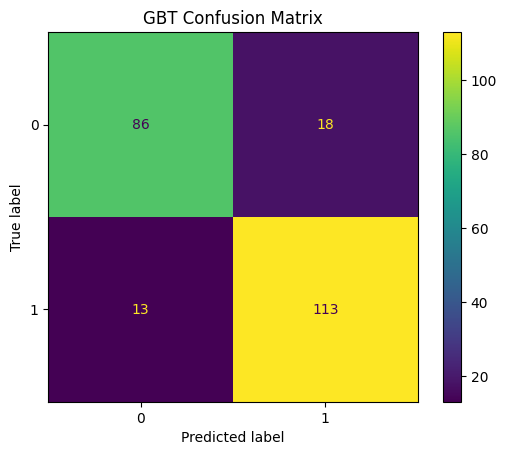

Classification report GBT:
               precision    recall  f1-score   support

           0       0.87      0.83      0.85       104
           1       0.86      0.90      0.88       126

    accuracy                           0.87       230
   macro avg       0.87      0.86      0.86       230
weighted avg       0.87      0.87      0.86       230



In [31]:
mask = GSCV_GBT.best_estimator_.named_steps['feat_select'].get_support()

print("Best model:{}".format(GSCV_GBT.best_estimator_))
print("Selected features:{}".format(df_train_enc.columns[mask]))

print("Best CV score: {:.2f}".format(GSCV_GBT.best_score_))
print("Test set score: {:.2f}".format(GSCV_GBT.score(X_test_enc,y_test)))

GBT_pred = GSCV_GBT.predict(X_test_enc)
cm = confusion_matrix(y_test, GBT_pred, labels = GSCV_GBT.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = GSCV_GBT.classes_)
disp.plot()
plt.title("GBT Confusion Matrix")
plt.show()
print("Classification report GBT:\n", classification_report(y_test,GBT_pred))

Best model:Pipeline(steps=[('scale', StandardScaler()),
                ('feat_select',
                 RFE(estimator=DecisionTreeClassifier(random_state=96),
                     n_features_to_select=18)),
                ('clf',
                 KNeighborsClassifier(n_neighbors=7, p=1, weights='distance'))])
Selected features:Index(['onehotencoder__Sex_F', 'onehotencoder__Sex_M',
       'onehotencoder__ChestPainType_ASY', 'onehotencoder__ChestPainType_NAP',
       'onehotencoder__ChestPainType_TA', 'onehotencoder__RestingECG_LVH',
       'onehotencoder__RestingECG_ST', 'onehotencoder__ExerciseAngina_N',
       'onehotencoder__ExerciseAngina_Y', 'onehotencoder__ST_Slope_Down',
       'onehotencoder__ST_Slope_Flat', 'onehotencoder__ST_Slope_Up',
       'remainder__Age', 'remainder__RestingBP', 'remainder__Cholesterol',
       'remainder__FastingBS', 'remainder__MaxHR', 'remainder__Oldpeak'],
      dtype='object')
Best CV score: 0.88
Test set score: 0.86


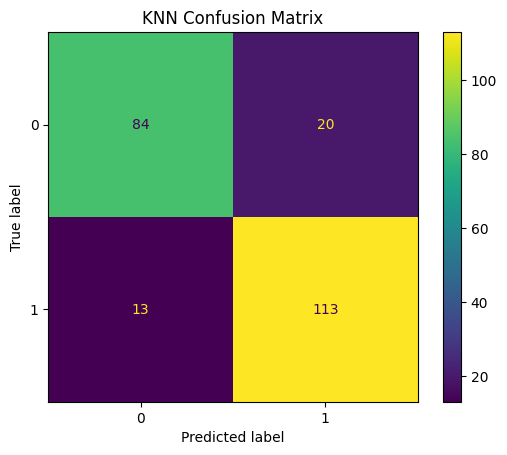

Classification report KNN:
               precision    recall  f1-score   support

           0       0.87      0.81      0.84       104
           1       0.85      0.90      0.87       126

    accuracy                           0.86       230
   macro avg       0.86      0.85      0.85       230
weighted avg       0.86      0.86      0.86       230



In [32]:
mask = GSCV_KNN.best_estimator_.named_steps['feat_select'].get_support()

print("Best model:{}".format(GSCV_KNN.best_estimator_))
print("Selected features:{}".format(df_train_enc.columns[mask]))

print("Best CV score: {:.2f}".format(GSCV_KNN.best_score_))
print("Test set score: {:.2f}".format(GSCV_KNN.score(X_test_enc,y_test)))

KNN_pred = GSCV_KNN.predict(X_test_enc)
cm = confusion_matrix(y_test, KNN_pred, labels = GSCV_KNN.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = GSCV_KNN.classes_)
disp.plot()
plt.title("KNN Confusion Matrix")
plt.show()
print("Classification report KNN:\n", classification_report(y_test,KNN_pred))

### Data Cleansing & Encoding Regresi

- Load kembali dataset yang akan digunakan.
- Ubah data kategorik string menjadi numerik.

In [59]:
df_paris_housing = pd.read_csv("paris_housing.csv")
df_paris_housing.head(20)

,squaremeters,numberofrooms,hasyard,haspool,floors,citycode,citypartrange,numprevowners,made,isnewbuilt,hasstormprotector,basement,attic,garage,hasstorageroom,hasguestroom,price,category
0,75523,3,no,yes,63,9373,3,8,2005,old,yes,4313,9005,956,no,7,7559081.5,Luxury
1,55712,58,no,yes,19,34457,6,8,2021,old,no,2937,8852,135,yes,9,5574642.1,Middle
2,86929,100,yes,no,11,98155,3,4,2003,new,no,6326,4748,654,no,10,8696869.3,Luxury
3,51522,3,no,no,61,9047,8,3,2012,new,yes,632,5792,807,yes,5,5154055.2,Middle
4,96470,74,yes,no,21,92029,4,2,2011,new,yes,5414,1172,716,yes,9,9652258.1,Luxury
5,79770,3,no,yes,69,54812,10,5,2018,old,yes,8871,7117,240,no,7,7986665.8,Luxury
6,75985,60,yes,no,67,6517,6,9,2009,new,yes,4878,281,384,yes,5,7607322.9,Luxury
7,64169,88,no,yes,6,61711,3,9,2011,new,yes,3054,129,726,no,9,6420823.1,Middle
8,92383,12,no,no,78,71982,3,7,2000,old,no,7507,9056,892,yes,1,9244344.0,Luxury
9,95121,46,no,yes,3,9382,7,9,1994,old,no,615,1221,328,no,10,9515440.4,Luxury


- Hapus Kolom "Category"

In [60]:
df_paris_housing2 = df_paris_housing.drop(['category'], axis=1)
df_paris_housing2.head(20)

,squaremeters,numberofrooms,hasyard,haspool,floors,citycode,citypartrange,numprevowners,made,isnewbuilt,hasstormprotector,basement,attic,garage,hasstorageroom,hasguestroom,price
0,75523,3,no,yes,63,9373,3,8,2005,old,yes,4313,9005,956,no,7,7559081.5
1,55712,58,no,yes,19,34457,6,8,2021,old,no,2937,8852,135,yes,9,5574642.1
2,86929,100,yes,no,11,98155,3,4,2003,new,no,6326,4748,654,no,10,8696869.3
3,51522,3,no,no,61,9047,8,3,2012,new,yes,632,5792,807,yes,5,5154055.2
4,96470,74,yes,no,21,92029,4,2,2011,new,yes,5414,1172,716,yes,9,9652258.1
5,79770,3,no,yes,69,54812,10,5,2018,old,yes,8871,7117,240,no,7,7986665.8
6,75985,60,yes,no,67,6517,6,9,2009,new,yes,4878,281,384,yes,5,7607322.9
7,64169,88,no,yes,6,61711,3,9,2011,new,yes,3054,129,726,no,9,6420823.1
8,92383,12,no,no,78,71982,3,7,2000,old,no,7507,9056,892,yes,1,9244344.0
9,95121,46,no,yes,3,9382,7,9,1994,old,no,615,1221,328,no,10,9515440.4


- Cek Data Kosong/Null/NaN

In [61]:
print("Data null \n", df_paris_housing2.isnull().sum())
print("Data kosong \n", df_paris_housing2.empty)
print("Data NaN \n", df_paris_housing2.isna().sum())

Data null 
 squaremeters         0
numberofrooms        0
hasyard              0
haspool              0
floors               0
citycode             0
citypartrange        0
numprevowners        0
made                 0
isnewbuilt           0
hasstormprotector    0
basement             0
attic                0
garage               0
hasstorageroom       0
hasguestroom         0
price                0
dtype: int64
Data kosong 
 False
Data NaN 
 squaremeters         0
numberofrooms        0
hasyard              0
haspool              0
floors               0
citycode             0
citypartrange        0
numprevowners        0
made                 0
isnewbuilt           0
hasstormprotector    0
basement             0
attic                0
garage               0
hasstorageroom       0
hasguestroom         0
price                0
dtype: int64


- Tidak ada data yang kosong, lanjut ke tahap train test split dengan presentase 80:20

In [62]:
X_regress = df_paris_housing2.drop('price',axis=1)
y_regress = df_paris_housing2['price']

X_train_ins, X_test_ins, y_train_ins, y_test_ins = train_test_split(X_regress, y_regress,\
                                                                     test_size=0.2,
                                                                     random_state=96)
print(X_train_ins.shape)
print(X_test_ins.shape)

(8000, 16)
(2000, 16)


- Encoding beberapa fitur kategorikal seperti hasyard, haspool, isnewbuilt, hasstormprotector, hasstorageroom

In [63]:
cat_cols = X_train_ins.select_dtypes(include=['object']).columns.tolist()
print("Kolom kategorik:",cat_cols)

col_transformer = make_column_transformer(
        (OneHotEncoder(), cat_cols),
        remainder='passthrough'
)

X_train_enc = col_transformer.fit_transform(X_train_ins)
X_test_enc = col_transformer.transform(X_test_ins)

df_train_enc = pd.DataFrame(X_train_enc, columns=col_transformer.get_feature_names_out())
df_test_enc = pd.DataFrame(X_test_enc, columns=col_transformer.get_feature_names_out())

df_train_enc.head(10)
df_test_enc.head(10)

Kolom kategorik: ['hasyard', 'haspool', 'isnewbuilt', 'hasstormprotector', 'hasstorageroom']


,onehotencoder__hasyard_no,onehotencoder__hasyard_yes,onehotencoder__haspool_no,onehotencoder__haspool_yes,onehotencoder__isnewbuilt_new,onehotencoder__isnewbuilt_old,onehotencoder__hasstormprotector_no,onehotencoder__hasstormprotector_yes,onehotencoder__hasstorageroom_no,onehotencoder__hasstorageroom_yes,...,remainder__numberofrooms,remainder__floors,remainder__citycode,remainder__citypartrange,remainder__numprevowners,remainder__made,remainder__basement,remainder__attic,remainder__garage,remainder__hasguestroom
0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,29.0,16.0,59896.0,6.0,7.0,2005.0,1778.0,6912.0,520.0,3.0
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,43.0,23.0,7471.0,7.0,7.0,2012.0,554.0,9690.0,833.0,8.0
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,82.0,75.0,4618.0,5.0,3.0,1999.0,468.0,5552.0,804.0,1.0
3,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,21.0,92.0,6475.0,6.0,7.0,1996.0,484.0,5922.0,992.0,5.0
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,45.0,18.0,63066.0,4.0,10.0,2017.0,6932.0,5206.0,340.0,1.0
5,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,70.0,1.0,51828.0,1.0,6.0,2017.0,5485.0,9071.0,475.0,9.0
6,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,53.0,64.0,12082.0,1.0,10.0,2007.0,328.0,6752.0,609.0,10.0
7,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,76.0,32.0,26354.0,6.0,9.0,2014.0,4005.0,7010.0,982.0,6.0
8,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,11.0,73.0,14020.0,6.0,8.0,1994.0,7193.0,7267.0,522.0,3.0
9,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,57.0,29.0,23054.0,1.0,10.0,2015.0,8059.0,8416.0,628.0,1.0


#### Tugas Regresi
- Buatlah dua Pipeline untuk perbandingan model algoritme.
- Bandingkan dua metode penskalaan yaitu StandardScaler dan MinMaxScaler menggunakan parameter grid.
- Kalian juga perlu menyesuaikan parameter dari algoritme regressor yang kalian pilih agar model dapat bekerja dengan baik pada dataset.
- Dua algoritme regressor yang dibandingkan bebas.

- Pembuatan pipeline dengan metode Lasso

In [64]:
pipe_Lasso = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('reg', Lasso(max_iter=1000))
])

param_grid_Lasso = {
    'reg__alpha': [0.01, 0.1, 1, 10, 100]
}

GSCV_Lasso = GridSearchCV(pipe_Lasso, param_grid_Lasso, cv=5, scoring='neg_mean_squared_error')
GSCV_Lasso.fit(X_train_enc, y_train_ins)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('reg', Lasso())]),
             param_grid={'reg__alpha': [0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

- Mencari pipeline terbaik dengan metode lasso

In [65]:
print("Best model: {}".format(GSCV_Lasso.best_estimator_))
print("Coefficients: {}".format(GSCV_Lasso.best_estimator_.named_steps['reg'].coef_))
print("Intercept: {}".format(GSCV_Lasso.best_estimator_.named_steps['reg'].intercept_))

Lasso_pred = GSCV_Lasso.predict(X_test_enc)

Best model: Pipeline(steps=[('scale', StandardScaler()), ('reg', Lasso(alpha=10))])
Coefficients: [-1.49160943e+03  0.00000000e+00 -1.48638876e+03  1.32786226e-13
  6.21419443e+01 -0.00000000e+00 -5.82249470e+01  2.96840881e-11
 -8.44885621e+00  1.81898940e-15  2.86787723e+06 -0.00000000e+00
  1.57280500e+03 -1.66915357e+01  1.29494980e+02 -0.00000000e+00
 -1.23171081e+01 -5.24000209e+00 -0.00000000e+00  1.68099933e+01
 -0.00000000e+00]
Intercept: 4985218.8786375


- Pembuatan pipeline dengan metode Ridge

In [66]:
pipe_Ridge = Pipeline(steps=[
    ('scale', MinMaxScaler()), 
    ('reg', Ridge())
])

param_grid_Ridge = {
    'reg__alpha': [0.01, 0.1, 1, 10, 100]
}

GSCV_Ridge = GridSearchCV(pipe_Ridge, param_grid_Ridge, cv=5, scoring='neg_mean_squared_error')
GSCV_Ridge.fit(X_train_enc, y_train_ins)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', MinMaxScaler()),
                                       ('reg', Ridge())]),
             param_grid={'reg__alpha': [0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

- Mencari pipeline terbaik dengan metode ridge

In [67]:
print("Best Model: {}".format(GSCV_Ridge.best_estimator_))
print("Coefficients: {}".format(GSCV_Ridge.best_estimator_.named_steps['reg'].coef_))
print("Intercept: {}".format(GSCV_Ridge.best_estimator_.named_steps['reg'].intercept_))

Ridge_pred = GSCV_Ridge.predict(X_test_enc)

Best Model: Pipeline(steps=[('scale', MinMaxScaler()), ('reg', Ridge(alpha=0.01))])
Coefficients: [-1.50181300e+03  1.50181300e+03 -1.49603225e+03  1.49603225e+03
  7.13153886e+01 -7.13153937e+01 -6.82701274e+01  6.82701274e+01
 -1.83455636e+01  1.83455693e+01  9.98721190e+06 -2.27575828e+01
  5.43375968e+03 -9.08297342e+01  4.38865717e+02 -4.66474288e+00
 -7.52002873e+01 -5.33300288e+01 -1.42441765e+01  8.85806984e+01
 -2.28924899e+01]
Intercept: 14792.04166721832


### Evaluasi Model

- Evaluasi dilakukan dengan membuat masing-masing dua Grid Search Cross Validation dengan metode Stratified KFold Cross Validation.
- **Untuk regresi, tampilkan hasil pengukuran kinerja model regresi dengan Mean Absolute Error, Mean Squared Error, dan Root Mean Squared Error. Untuk memudahkan pimpinan divisi membaca hasil, buatlah tabel yang menampilkan perbandingan harga asli properti dan harga hasil prediksi dua model regresi beserta grafik visualnya.**

- hasil pengukuran kinerja model regresi Lasso dengan Mean Absolute
Error, Mean Squared Error, dan Root Mean Squared Error

In [68]:
mse_Lasso = mean_squared_error(y_test_ins, Lasso_pred)
mae_Lasso = mean_absolute_error(y_test_ins, Lasso_pred)

print("Lasso MAE:", mae_Lasso)
print("Lasso MSE:", mse_Lasso)
print("Lasso Root Mean Squared Error:", np.sqrt(mse_Lasso))

Lasso MAE: 1515.9411439463713
Lasso MSE: 3813710.596590152
Lasso Root Mean Squared Error: 1952.8723963920818


- hasil pengukuran kinerja model regresi Ridge dengan Mean Absolute
Error, Mean Squared Error, dan Root Mean Squared Error

In [69]:
mse_Ridge = mean_squared_error(y_test_ins, Ridge_pred) 
mae_Ridge = mean_absolute_error(y_test_ins, Ridge_pred)

print("Ridge MAE:", mae_Ridge)
print("Ridge MSE:", mse_Ridge)
print("Ridge Root Mean Squared Error:", np.sqrt(mse_Ridge))

Ridge MAE: 1517.6543826846728
Ridge MSE: 3820605.3612891086
Ridge Root Mean Squared Error: 1954.6368873243716


- Tabel perbandingan harga asli properti dan hasil prediksi model regresi Lasso

In [70]:
df_results= pd.DataFrame(y_test_ins)
df_results['Prediksi Lasso']=Lasso_pred
df_results.head(10)

,price,Prediksi Lasso
596,6373356.5,6.372534e+06
8143,252179.2,2.536053e+05
2552,7551847.9,7.549325e+06
3748,6666928.6,6.667877e+06
138,6327623.7,6.328747e+06
7266,3337636.7,3.337575e+06
3286,7801697.7,7.801264e+06
2686,7580464.4,7.579774e+06
6211,3758386.4,3.761034e+06
2066,7322035.5,7.323430e+06


- Tabel perbandingan harga asli properti dan hasil prediksi model regresi Ridge

In [71]:
df_results['Prediksi Ridge']=Ridge_pred
df_results.head(10)

,price,Prediksi Lasso,Prediksi Ridge
596,6373356.5,6.372534e+06,6.372491e+06
8143,252179.2,2.536053e+05,2.537040e+05
2552,7551847.9,7.549325e+06,7.549382e+06
3748,6666928.6,6.667877e+06,6.667927e+06
138,6327623.7,6.328747e+06,6.328701e+06
7266,3337636.7,3.337575e+06,3.337533e+06
3286,7801697.7,7.801264e+06,7.801264e+06
2686,7580464.4,7.579774e+06,7.579754e+06
6211,3758386.4,3.761034e+06,3.761056e+06
2066,7322035.5,7.323430e+06,7.323400e+06


- Grafik visual perbandingan model Lasso dan Ridge

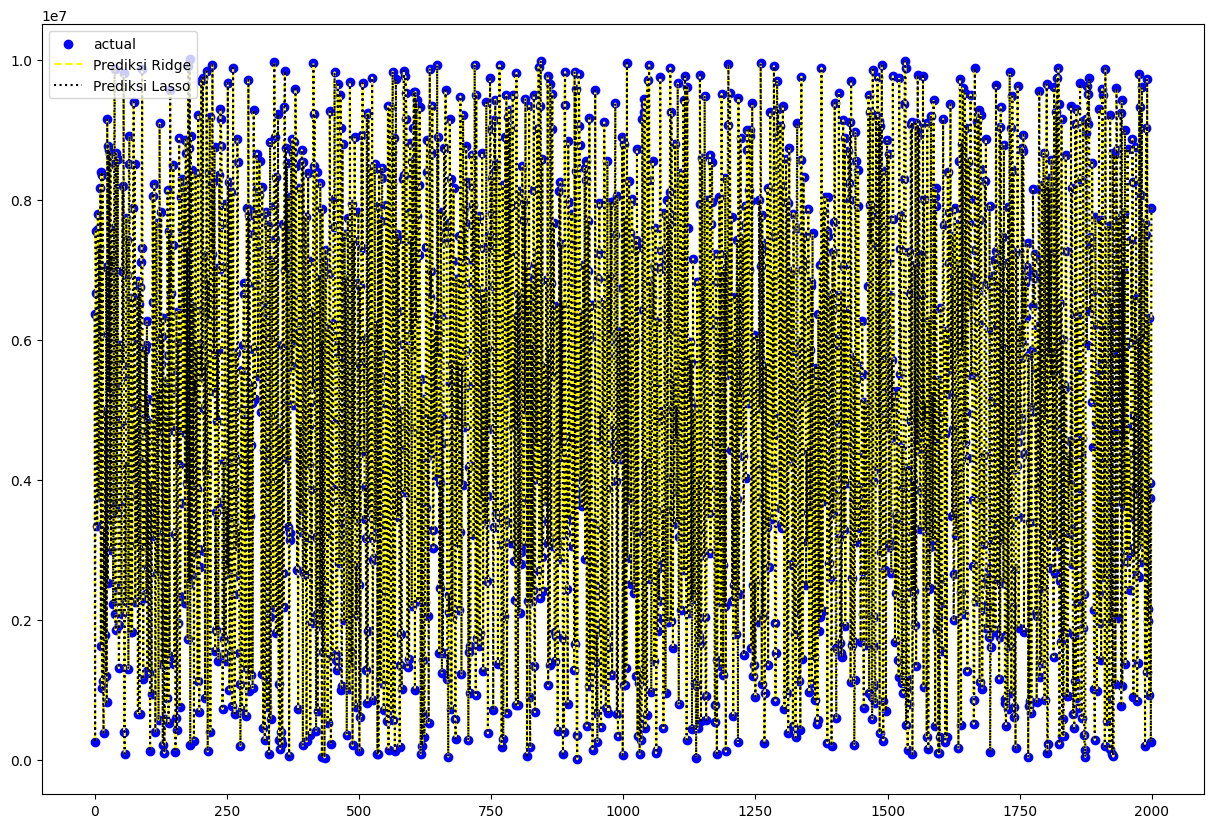

In [72]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
data_len = range(len(y_test_ins))
plt.scatter(data_len, df_results.price, color='blue', label='actual')
plt.plot(data_len, df_results['Prediksi Ridge'], color='yellow', linestyle='--', label='Prediksi Ridge')
plt.plot(data_len, df_results['Prediksi Lasso'], color='black', linestyle=':', label='Prediksi Lasso')
plt.legend()
plt.show()

## Kesimpulan

Silahkan jawab pertanyaan berikut pada cell markdown yang sudah disediakan:

**Prediksi Penyakit Jantung**

1. Apa saja feature-feature yang relevan untuk membedakan antara pasien yang terindikasi sakit jantung dengan yang sehat?

2. Model classifier apakah yang memiliki performa paling baik terhadap dataset? Apakah parameter setting yang paling optimal dari model tersebut?

4. Dari hasil Confusion Matrix dan Classification Report, hal apa yang bisa kalian simpulkan dari performa model terbaik kalian?

**Regresi Harga Rumah**

1. Model regressor apakah yang memiliki performa paling baik terhadap dataset? Apakah parameter setting yang paling optimal dari model tersebut?

4. Dari hasil metrik evaluasi, hasil prediksi, dan grafik regresi, hal apa yang bisa kalian simpulkan dari performa model terbaik kalian?

Kelompok: BE

- Tesya Rakhel / 220711896
- Imanuella Daniel / 220711901
- Tok Se Ka / 220711904
- Yobel Nugroho / 220711905
- Dina Oktavia Pangaribuan / 220711928

Jawaban:
- **Prediksi Penyakit Jantung**

1. Berdasarkan hasil pengamatan dari kedua model yang telah dibuat yaitu model dengan algoritma GBT dan algoritma KNN. Model dengan algoritma GBT memiliki skor yang sedikit lebih tinggi dibandingkan dengan model dengan algoritma KNN. Oleh karena itu, fitur-fitur yang relevan diambil dari model GBT. Berikut adalah fitur-fitur yang relevan dengan model GBT: 
    1. ChestPainType_ASY (Jenis nyeri dada)
    2. ST_Slope_Up (Slope ST segment)
    3. Cholesterol (Kolesterol)
    4. MaxHR (Detak jantung maksimum)   
    Ini menunjukkan bahwa informasi tentang jenis nyeri dada, karakteristik segment ST (kelainan irama jantung), kolesterol, dan detak jantung maksimum dianggap penting dalam membedakan antara pasien yang sakit jantung dan sehat.
  
2. Setelah melakukan evaluasi dan analisis terhadap hasil evaluasi dari kedua model yaitu GBT dan KNN, maka dapat disimpulkan bahwa model dengan algoritma GBT mempunyai performa yang lebih bagus dibandingkan dengan algoritma KNN. Hal tersebut dapat dilihat melalui perbandingan hasil CV Score, Test Score, dan Matrix Evaluasi dari kedua model. Test Score dan CV Score dari algoritma GBT mempunyai nilai 0.84, sedikit lebih tinggi dibandingkan dengan KNN yaitu dengan nilai 0.83. Nilai akurasi dari model GBT adalah 84%, sedangkan model KNN 83%. Pada matrix evaluasi, Model KNN memiliki sedikit lebih banyak False Positives tetapi jumlah False Negatives yang sama dengan model GBT, yang bisa menunjukkan bahwa KNN mungkin lebih banyak untuk salah mengklasifikasikan data negatif sebagai data positif. Parameter setting yang digunakan pada model GBT adalah :
   1. Classifiernya menggunakan GradientBoosting dengan Learning Rate 0.01 dan random state 96
   2. Scalernya menggunakan MinMaxScaler
   3. Fitur Selection defaultnya menggunakan SelectKBest dengan range (2-6) dan SelectFromModel dengan model Decision Tree Classifier (random state 96 dan max features 4) sebagai pembandingnya di parameter gridnya.

3. Confusion Matrix dari GBT terdapat 84 true negatives (TN), 110 true positives (TP), 20 false negatives (FN), dan 16 false positives (FP).
Classification Report Model GBT memiliki precision yang baik untuk kelas 0 (0.84) dan kelas 1 (0.85), serta recall yang baik untuk kelas 0 (0.81) dan kelas 1 (0.87).
Hal-hal yang bisa disimpulkan dari performa model terbaik adalah:
    1. Performa: Kedua model menunjukkan performa yang hampir sama dengan sedikit keunggulan pada model GBT.
    2. False Positives/Negatives: Model KNN memiliki sedikit lebih banyak False Positives tetapi jumlah False Negatives yang sama dengan model GBT, yang bisa menunjukkan bahwa KNN mungkin lebih condong untuk salah mengklasifikasikan negatif sebagai positif (kesalahan tipe I).
    4. GBT masih mempunyai performa yang sedikit lebih tinggi dibandingkan dengan model KNN pada dataset “Heart Disease”.
    5. Model memiliki kemampuan yang baik dalam mengklasifikasikan pasien yang sehat dan yang terindikasi sakit jantung dengan precision dan recall yang lumyan tinggi dengan niali 0.84 dan 0.81. 

- **Regresi Harga Rumah**
1. Model regressor yang memiliki pergorma paling baik terhadap dataset adalah model Lasso, hal ini dikarenakan model Lasso memiliki nilai MAE, MSE, dan RMSE yang sedikit lebih rendah dibandingkan dengan model Ridge. Sebagai contoh Root MSE (Mean Squared Error) pada model Lasso memiliki nilai 1952, sedangkan Root MSE pada model Ridge sebesar 1954. Parameter setting paling optimal dari model tersebut adalah reg alpha dengan nilai koefisien 10.
   
3. Berdasarkan pengamatan pada matrik evaluasi, hasil prediksi dan grafik regresi model Lasso (garis hitam) memiliki performa yang lebih baik terhadap dataset dengan hasil yang lebih presisi terhadap data aktual (actual = blue) dibandingkan dengan model Ridge (garis kuning). Meskipun perbandingan pada grafik visual tidak menunjukkan perbedaan yang signifikan antara kedua model, selisih hasil prediksi dapat kita lihat pada tabel perbandingan. Pada data frame prediksi harga properti terdapat data ke 596 dengan nilai Actual Price sebesar 6373356.5 . Dari model Lasso diperoleh hasil prediksi senilai 6.372515e+06 (6372515), sedangkan dari model Ridge diperoeh hasil prediksi senilai 6.372491e+06 (6372491). Pada kasus lain, dalam data ke 2552 dengan nilai actual price sebesar 7551847.9 model Lasso memberi hasil prediksi 7.549391e+06 (7549391) sedangkan model Ridge memberi hasil prediksi 7.549382e+06 (7549382) . Berdasarkan data yang telah diamati, dapat disimpulkan bahwa model Lasso lebih presisi dibandingkan dengan model Ridge. 